A data exploration and preprocessing notebook or report that analyzes the dataset,
handles missing values, and prepares the data for modeling

In [9]:
import pandas as pd  
df = pd.read_csv("Customer_data.csv")  
df.info()  # Check dataset info     
df.describe()
def customer_outliers(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
    return outliers
print("\nOutliers in customer_Data:")
print(customer_outliers)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [2]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [2]:
print(df.isnull().sum())  


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [3]:
df.drop(columns=['customerID'], inplace=True)  # Drop ID column if not useful  


In [4]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)  


C:\Users\nethi\AppData\Local\Temp\ipykernel_23376\2253221504.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


In [5]:
from sklearn.preprocessing import OneHotEncoder  
df = pd.get_dummies(df)  


In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)  


A machine learning model capable of predicting customer churn. 

In [7]:
X = df.drop(columns=['Churn'])  
y = df['Churn']  


In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


In [9]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  


In [10]:
from sklearn.linear_model import LogisticRegression  
model = LogisticRegression()  
model.fit(X_train, y_train)  
print("Model Training Completed!")  


Model Training Completed!


An evaluation of model performance using appropriate metrics (such as accuracy,
precision, recall, F1 score, etc.)

In [11]:
y_pred = model.predict(X_test)  


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  

accuracy = accuracy_score(y_test, y_pred)  
precision = precision_score(y_test, y_pred)  
recall = recall_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred)  

print(f"Accuracy: {accuracy}")  
print(f"Precision: {precision}")  
print(f"Recall: {recall}")  
print(f"F1 Score: {f1}")  


Accuracy: 0.8197303051809794
Precision: 0.683076923076923
Recall: 0.5951742627345844
F1 Score: 0.6361031518624641


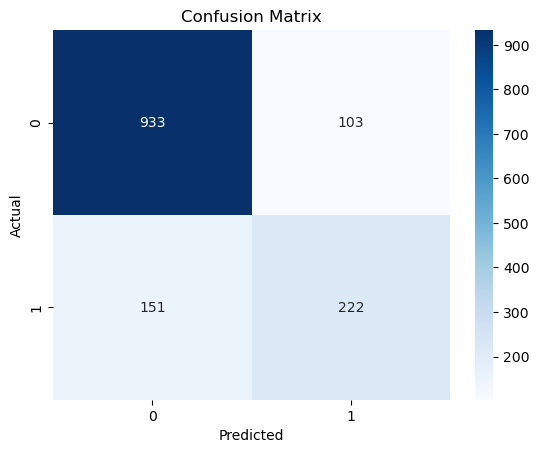

In [13]:
from sklearn.metrics import confusion_matrix  
import seaborn as sns  
import matplotlib.pyplot as plt  

cm = confusion_matrix(y_test, y_pred)  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  
plt.xlabel("Predicted")  
plt.ylabel("Actual")  
plt.title("Confusion Matrix")  
plt.show()  
